Step
1. Convert the bipartite matrix into a graph.
2. Compute centrality measures for the keywords.
3. Create a visualization of the network with nodes sized according to their centrality.

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path to your Excel file
file_path = 'bipartite_matrix.xlsx'
# Load the Excel file into a DataFrame
bipartite_matrix = pd.read_excel(file_path)

# Set the first column as the index
bipartite_matrix = bipartite_matrix.set_index(bipartite_matrix.columns[0])

# Transpose the DataFrame to have contexts as rows and keywords as columns
bipartite_matrix_transposed = bipartite_matrix.transpose()


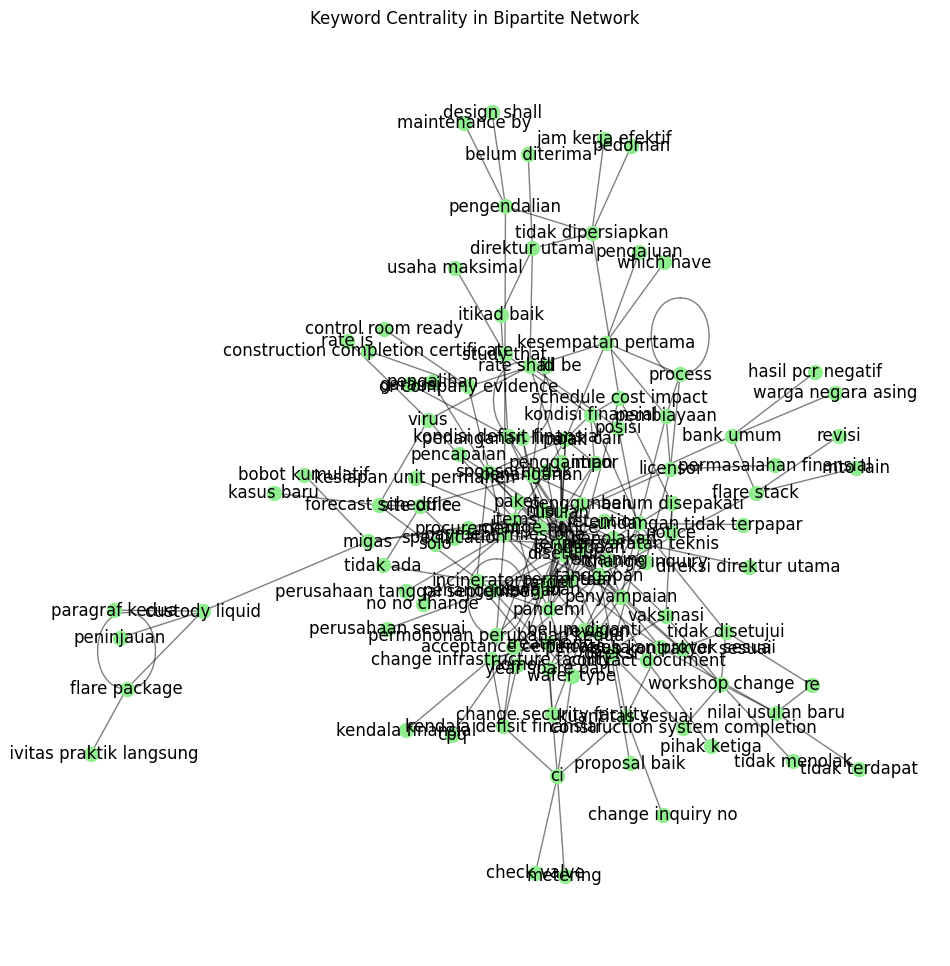

In [3]:
# Transposing the matrix to make columns as nodes and rows as edges
#bipartite_matrix_transposed = bipartite_matrix.set_index('Unnamed: 0').transpose()

# Creating a graph from the DataFrame
B = nx.Graph()
# Adding nodes with the bipartite attribute
B.add_nodes_from(bipartite_matrix_transposed.columns, bipartite=0)
B.add_nodes_from(bipartite_matrix_transposed.index, bipartite=1)

# Adding edges from DataFrame
for context, keywords in bipartite_matrix_transposed.iterrows():
    for keyword in keywords.index:
        if keywords[keyword] == 1:
            B.add_edge(context, keyword)

# Calculating degree centrality for the keyword nodes
centrality = nx.degree_centrality(B)
# Extracting centrality for keywords only
keyword_centrality = {node: centrality[node] for node in bipartite_matrix_transposed.columns}

# Drawing the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(B)  # positions for all nodes

# Separating the node lists
keyword_nodes = [n for n, d in B.nodes(data=True) if d['bipartite']==0]
context_nodes = [n for n, d in B.nodes(data=True) if d['bipartite']==1]

# Nodes
nx.draw_networkx_nodes(B, pos, nodelist=keyword_nodes, node_size=[v * 5000 for v in keyword_centrality.values()], node_color='lightblue')
nx.draw_networkx_nodes(B, pos, nodelist=context_nodes, node_size=100, node_color='lightgreen')

# Edges
nx.draw_networkx_edges(B, pos, width=1.0, alpha=0.5)

# Labels
nx.draw_networkx_labels(B, pos)

plt.title("Keyword Centrality in Bipartite Network")
plt.axis('off')
plt.show()


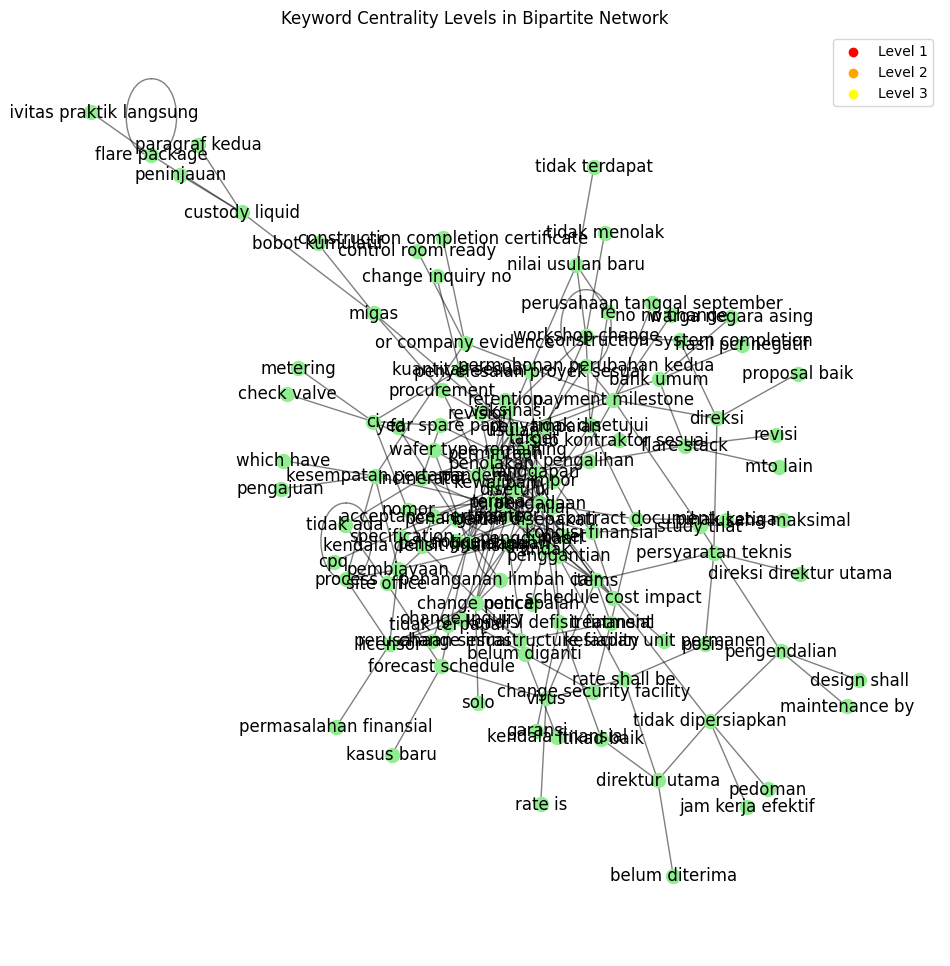

In [4]:
import numpy as np

# Function to categorize centrality into levels
def categorize_centrality(centrality_values, num_levels=3):
    """ Categorize centrality values into specified number of levels. """
    levels = np.linspace(0, 1, num_levels + 1)
    centrality_levels = {}
    for node, centrality in centrality_values.items():
        for i in range(num_levels):
            if levels[i] <= centrality <= levels[i + 1]:
                centrality_levels[node] = i + 1
                break
    return centrality_levels

# Categorizing the centrality of keywords into levels
num_levels = 3
keyword_centrality_levels = categorize_centrality(keyword_centrality, num_levels)

# Colors for different levels
level_colors = ['red', 'orange', 'yellow']

# Drawing the graph with levels
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(B)

# Nodes - Keywords with different colors for different centrality levels
for level in range(1, num_levels + 1):
    nodes_of_level = [node for node in keyword_nodes if keyword_centrality_levels[node] == level]
    nx.draw_networkx_nodes(B, pos, nodelist=nodes_of_level, node_size=3000, node_color=level_colors[level - 1])

# Nodes - Contexts
nx.draw_networkx_nodes(B, pos, nodelist=context_nodes, node_size=100, node_color='lightgreen')

# Edges
nx.draw_networkx_edges(B, pos, width=1.0, alpha=0.5)

# Labels
nx.draw_networkx_labels(B, pos)

# Legend
for level, color in zip(range(1, num_levels + 1), level_colors):
    plt.scatter([], [], color=color, label=f'Level {level}')
plt.legend()

plt.title("Keyword Centrality Levels in Bipartite Network")
plt.axis('off')
plt.show()


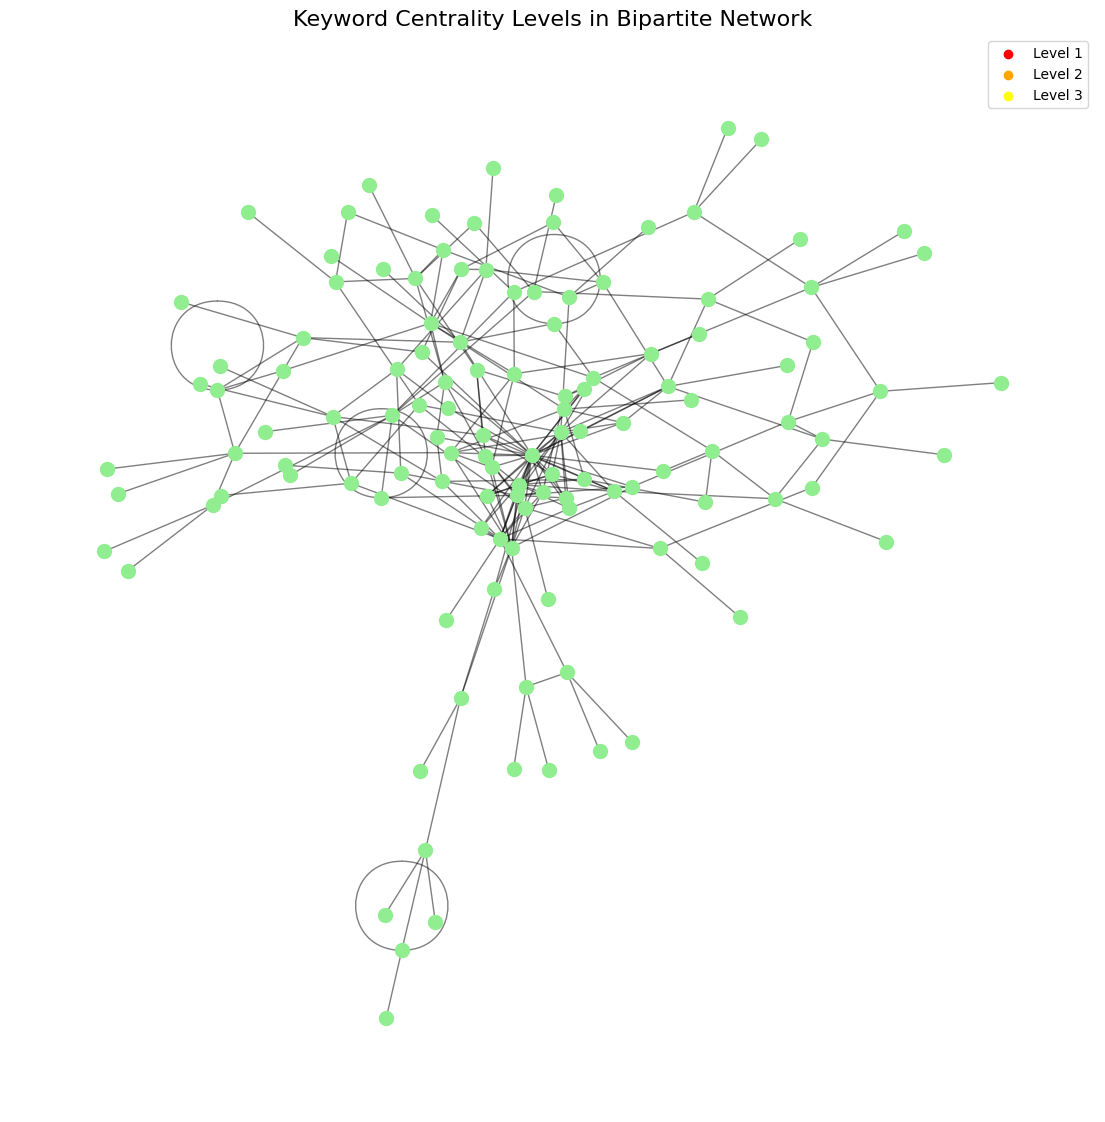

In [5]:
# Adjusting the font size and node size based on centrality level
# Bigger font and node size for more central keywords

# Font sizes for different levels
font_sizes = {1: 14, 2: 12, 3: 10}
# Node sizes for different levels
node_sizes = {1: 3500, 2: 2500, 3: 1500}

# Drawing the graph with adjusted font sizes and node sizes
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(B)

# Nodes - Keywords with different colors and sizes for different centrality levels
for level in range(1, num_levels + 1):
    nodes_of_level = [node for node in keyword_nodes if keyword_centrality_levels[node] == level]
    nx.draw_networkx_nodes(B, pos, nodelist=nodes_of_level, node_size=node_sizes[level], node_color=level_colors[level - 1])
    nx.draw_networkx_labels(B, pos, labels={node: node for node in nodes_of_level}, font_size=font_sizes[level])

# Nodes - Contexts
nx.draw_networkx_nodes(B, pos, nodelist=context_nodes, node_size=100, node_color='lightgreen')

# Edges
nx.draw_networkx_edges(B, pos, width=1.0, alpha=0.5)

# Legend
for level, color in zip(range(1, num_levels + 1), level_colors):
    plt.scatter([], [], color=color, label=f'Level {level}')
plt.legend()

plt.title("Keyword Centrality Levels in Bipartite Network", fontsize=16)
plt.axis('off')
plt.show()
